In [1]:
import py_ctdyn as dyn
import os, pathos
from tqdm import tqdm

In [2]:
def parallel_run_wrapper (ctdyn_param) :
    """
    Wrapper to perform the CTDYN parallel run.
    """
    dyn.run_ctdyn (ctdyn_param=ctdyn_param, verbose=False,
                   rerun=False)

In [3]:
dir_out = "parallel_run"
if not os.path.exists (dir_out) :
    os.mkdir (dir_out)

In [4]:
params = []
nrun = 4
cm_i = np.logspace (2, 2+nrun, nrun, endpoint=False)
for ii in range (nrun) :
    param = {"outputs" : {"dir":"'{}/run_{}'".format (dir_out, ii+1)},
             "controls" : {"cm_i":cm_i[ii]}
             }
    params.append (param)

In [5]:
params

[{'outputs': {'dir': "'parallel_run/run_1'"}, 'controls': {'cm_i': 100.0}},
 {'outputs': {'dir': "'parallel_run/run_2'"}, 'controls': {'cm_i': 1000.0}},
 {'outputs': {'dir': "'parallel_run/run_3'"}, 'controls': {'cm_i': 10000.0}},
 {'outputs': {'dir': "'parallel_run/run_4'"}, 'controls': {'cm_i': 100000.0}}]

In [6]:
process_pool = pathos.pools._ProcessPool (processes=2,
                                          maxtasksperchild=1)
with process_pool as p :
    list (tqdm (p.imap (parallel_run_wrapper,
                        params,
                        ),
                total=len (params))
          )
    p.close ()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [04:26<00:00, 66.70s/it]


In [7]:
jj, time = 1, 1

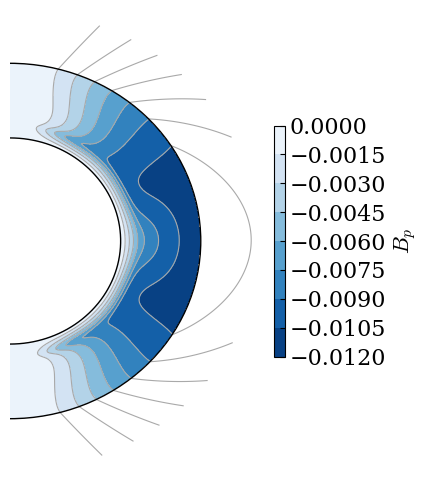

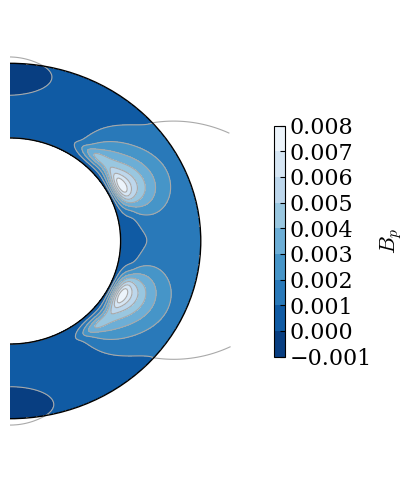

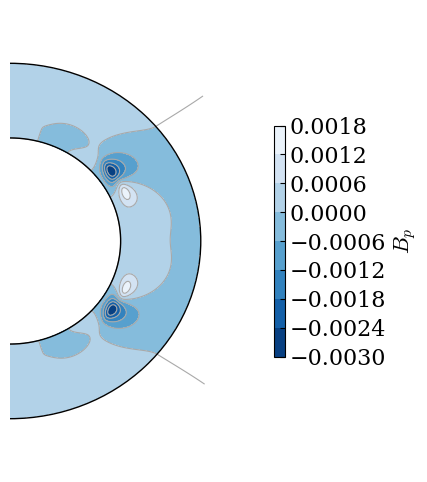

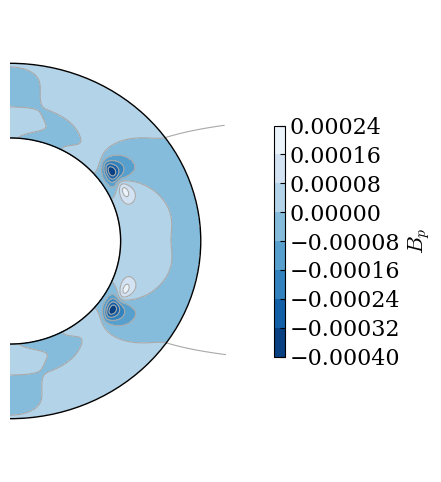

In [8]:
for ii in range (nrun) :
    filename = "{}//run_{}/pfld.{}.t{}.A00".format (dir_out, ii+1, str (jj).zfill (6), 
                                                    str (time).zfill (2))
    r, theta, mesh = dyn.read_field_map (filename)
    fig = dyn.plot_meridional_map (r, theta, mesh, label=r"$B_p$",
                                   mode="contourf")

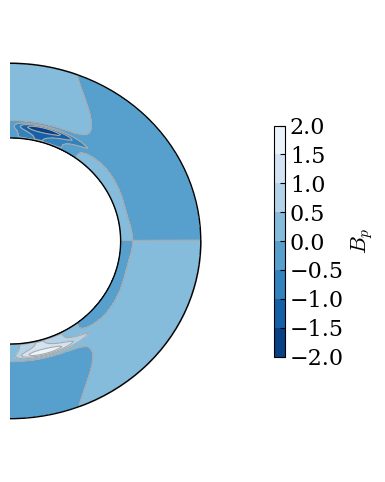

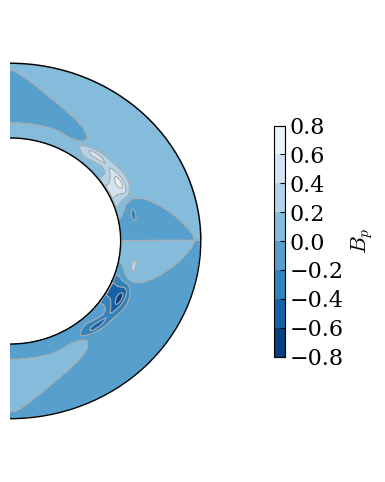

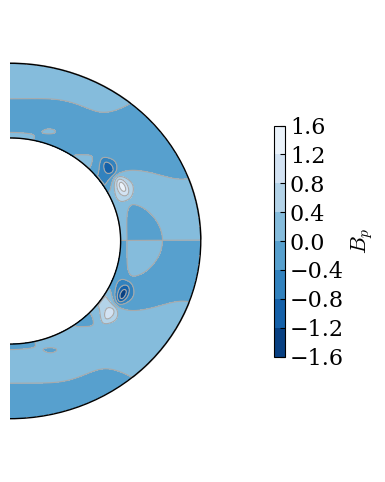

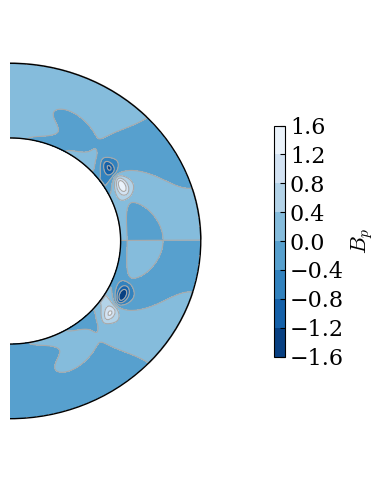

In [9]:
for ii in range (nrun) :
    filename = "{}//run_{}/tfld.{}.t{}.A00".format (dir_out, ii+1, str (jj).zfill (6), 
                                                    str (time).zfill (2))
    r, theta, mesh = dyn.read_field_map (filename)
    fig = dyn.plot_meridional_map (r, theta, mesh, label=r"$B_p$",
                                   mode="contourf")

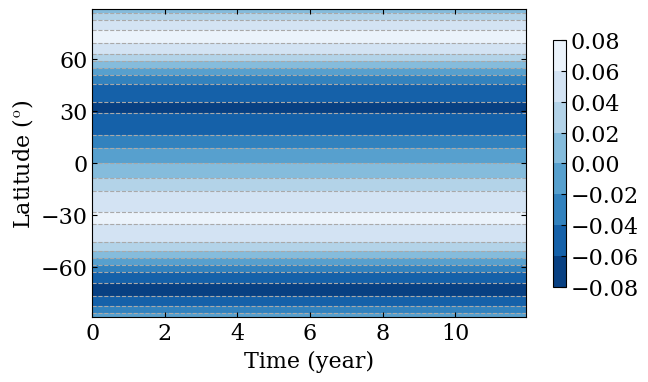

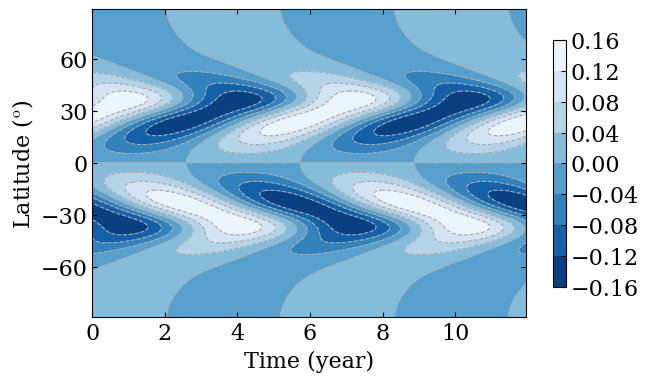

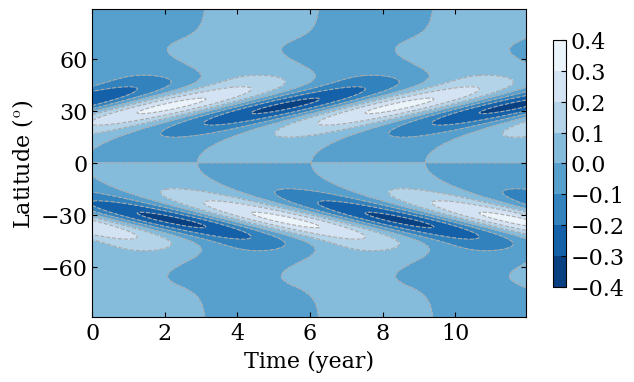

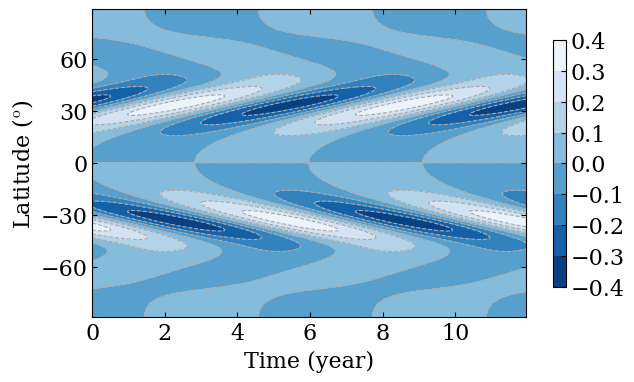

In [10]:
for ii in range (nrun) :
    filename = "{}/run_{}/butf.000001.a00".format (dir_out, ii+1)
    t, theta, mesh = dyn.read_butterfly_diagram (filename)
    fig = dyn.plot_butterfly_diagram (t, theta, mesh)

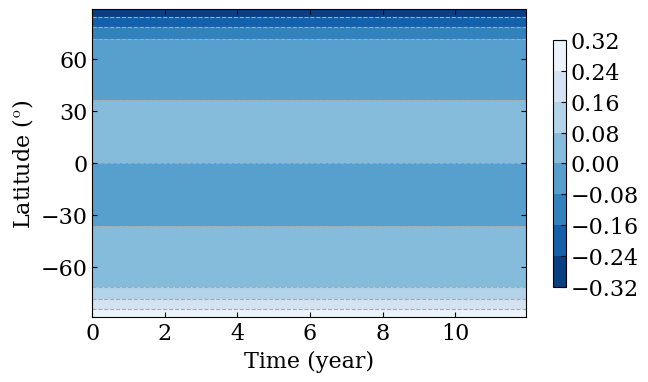

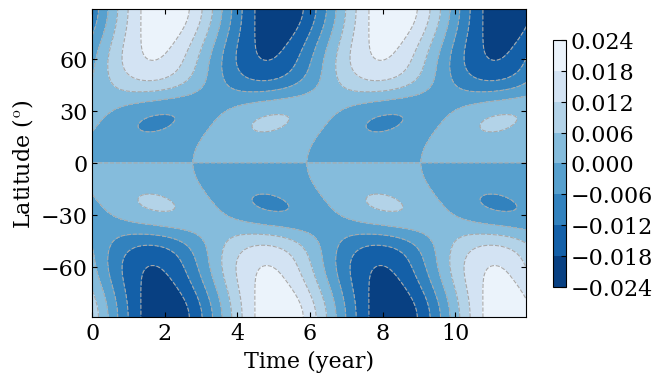

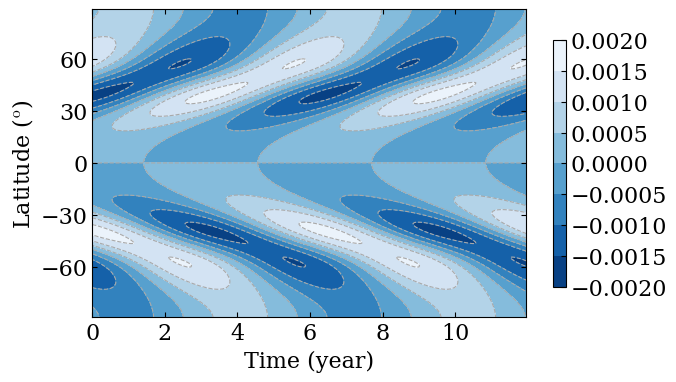

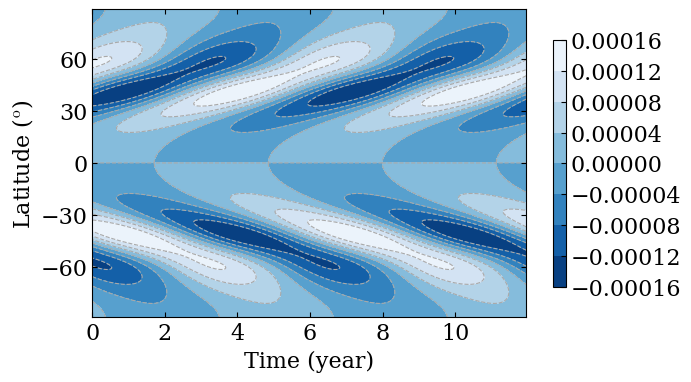

In [11]:
for ii in range (nrun) :
    filename = "{}/run_{}/brbp.000001.a00".format (dir_out, ii+1)
    t, theta, mesh = dyn.read_butterfly_diagram (filename)
    fig = dyn.plot_butterfly_diagram (t, theta, mesh)